<a href="https://www.kaggle.com/code/erickbravo/project3-erickbravo?scriptVersionId=125308876" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

print('Part 1 of the assignement\nWhere we dump in the dataset to use\n ')
# Load the data
df = pd.read_csv("/kaggle/input/kidneystones/dataset-kidney-stone.csv")
df = df.drop("Unnamed: 0", axis=1)

# Prepare the data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

print('Part 2 of the assignment\nWhere we split the data\n')
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Part 3 of the assignment\nWhere we start using the XGBboost model\n')
# Train the XGBoost model
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)



Part 1 of the assignement
Where we dump in the dataset to use
 
Part 2 of the assignment
Where we split the data

Part 3 of the assignment
Where we start using the XGBboost model




Plotting a heatmap of our true data to see what comes to mind


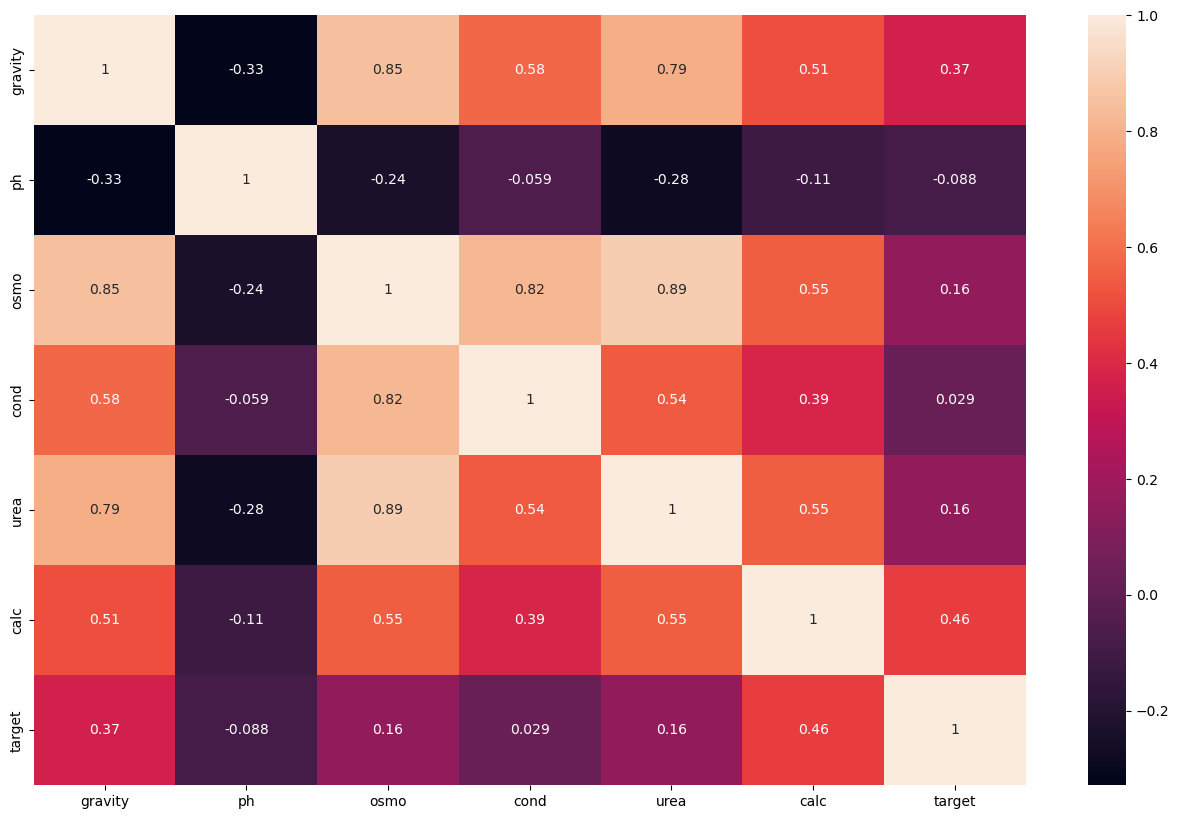

In [2]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True)
print('\nPlotting a heatmap of our true data to see what comes to mind')

In [3]:
print('Part 4 of the assignment')
print("Accuracy:", accuracy_score(y_test, y_pred), "               Here we have a roughly semi accurate model but with more data it could become precise")
print("Precision:", precision_score(y_test, y_pred),"              The precision is more or less a coin flip")
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred)," The mean error is at the 0.28 range, low but could be lower")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred),"  The squared error mirrors the absolute error range")
print("R-squared Score:", r2_score(y_test, y_pred),"                  Its not a very high R score which is indicative of the small dataset")

accu4 = accuracy_score(y_test, y_pred)
precis4 = precision_score(y_test, y_pred)
abso4 = mean_absolute_error(y_test, y_pred)
square4 = mean_squared_error(y_test, y_pred)
rsquare4 = r2_score(y_test, y_pred)

Part 4 of the assignment
Accuracy: 0.7222222222222222                Here we have a roughly semi accurate model but with more data it could become precise
Precision: 0.5555555555555556               The precision is more or less a coin flip
Recall: 0.8333333333333334
F1-score: 0.6666666666666667
Mean Absolute Error: 0.2777777777777778  The mean error is at the 0.28 range, low but could be lower
Mean Squared Error: 0.2777777777777778   The squared error mirrors the absolute error range
R-squared Score: -0.25                   Its not a very high R score which is indicative of the small dataset


In [4]:
print('Part 5 of the assignment')
# Define the hyperparameter grid
hyperparameter_grid = {
    "max_depth": range(1, 10),
    "learning_rate": np.linspace(0.01, 0.5, 100),
    "n_estimators": range(50, 200, 10),
}

# Create a random search object
random_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparameter_grid,
    cv=5,
    n_iter=50,
    n_jobs=-1,
)

# Fit the random search object to the training data
random_cv.fit(X_train, y_train)

# Print the best hyperparameters found
print(random_cv.best_params_)

best_model = xgb.XGBClassifier(**random_cv.best_params_)
best_model.fit(X, y)

# Make predictions on the entire dataset
y_pred = best_model.predict(X)

# Evaluate the performance of the model
print('This is a rehash using the Random CV module so the results are more tuned in')
print("Accuracy:", accuracy_score(y, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y, y_pred))
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared Score:", r2_score(y, y_pred))

accu5 = accuracy_score(y, y_pred)
abso5 = mean_absolute_error(y, y_pred)
square5 = mean_squared_error(y, y_pred)
rsquare5 = r2_score(y, y_pred)

Part 5 of the assignment
{'n_estimators': 140, 'max_depth': 1, 'learning_rate': 0.12383838383838383}
This is a rehash using the Random CV module so the results are more tuned in
Accuracy: 0.9555555555555556
Mean Absolute Error: 0.044444444444444446
Mean Squared Error: 0.044444444444444446
R-squared Score: 0.8222222222222222


In [5]:
print('Part 6 of the assignment')
print('Overall usage of XGBoost and the inclusion of RandomCV hyperparameters show promising results!\nWe are able to see just how much of a varying differece it created.')
print('\nUsing only XGB we get ok results\nAbsolute:',abso4 ,' Squared: ',square4, 'and R^2 scores: ',rsquare4)
print('\nUsing the RandomCV Hyperboost, we get a massively increased accuracy for the same stats\nAbsolute:',abso5 ,' Squared: ',square5, 'and R^2 scores: ',rsquare5)
print('The numbers crunch down the  percentages and help to show how even an insuficent amount of data can be shined and polished to show outstanding results\n',
     'Of course, more data could always be gathered to make it truely meanful to whatever you are going to show')

Part 6 of the assignment
Overall usage of XGBoost and the inclusion of RandomCV hyperparameters show promising results!
We are able to see just how much of a varying differece it created.

Using only XGB we get ok results
Absolute: 0.2777777777777778  Squared:  0.2777777777777778 and R^2 scores:  -0.25

Using the RandomCV Hyperboost, we get a massively increased accuracy for the same stats
Absolute: 0.044444444444444446  Squared:  0.044444444444444446 and R^2 scores:  0.8222222222222222
The numbers crunch down the  percentages and help to show how even an insuficent amount of data can be shined and polished to show outstanding results
 Of course, more data could always be gathered to make it truely meanful to whatever you are going to show
